In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import squarify
import pprint

In [5]:
df_big = pd.read_csv('top500histories', index_col=0)

In [6]:
df = pd.read_csv('top500.csv', index_col=0)

In [7]:
df_old = pd.read_csv('df1819', index_col=0)

In [8]:
teams = pd.read_csv('teams', index_col=0)

In [9]:
df_attackers = df[df['element_type'] >= 3]

In [10]:
df_defenders = df[df['element_type'] <= 2]

Steps:
Ask the following questions and look for the answers using code and plots:  
Can you count something interesting?  
Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?  
Can you make a bar plot or a histogram?  
Can you compare two related quantities?  
Can you make a scatterplot?  
Can you make a time-series plot?  
Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?  
Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?


In [11]:
teams

,code,draw,form,id,loss,name,played,points,position,short_name,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home,team_division,unavailable,win
0,3,0,NaN,1,0,Arsenal,0,0,0,ARS,4,1190,1150,1330,1280,1270,1230,NaN,False,0
1,7,0,NaN,2,0,Aston Villa,0,0,0,AVL,2,1060,1030,1050,1030,1080,1040,NaN,False,0
2,91,0,NaN,3,0,Bournemouth,0,0,0,BOU,3,1070,1030,1180,1110,1120,1090,NaN,False,0
3,36,0,NaN,4,0,Brighton,0,0,0,BHA,3,1160,1040,1130,1030,1120,1050,NaN,False,0
4,90,0,NaN,5,0,Burnley,0,0,0,BUR,3,1130,1060,1050,1050,1110,1050,NaN,False,0
5,8,0,NaN,6,0,Chelsea,0,0,0,CHE,4,1320,1200,1350,1310,1300,1270,NaN,False,0
6,31,0,NaN,7,0,Crystal Palace,0,0,0,CRY,3,1130,1060,1020,1040,1100,1110,NaN,False,0
7,11,0,NaN,8,0,Everton,0,0,0,EVE,3,1190,1110,1160,1090,1160,1100,NaN,False,0
8,13,0,NaN,9,0,Leicester,0,0,0,LEI,4,1240,1180,1190,1110,1280,1230,NaN,False,0
9,14,0,NaN,10,0,Liverpool,0,0,0,LIV,5,1330,1300,1370,1340,1360,1340,NaN,False,0


In [12]:
df1 = df[['web_name', 'total_points', 'team']]
df1.head()

,web_name,total_points,team
id_,,,
166,Vardy,144,9
215,De Bruyne,125,11
192,Mané,121,10
233,Rashford,120,12
11,Aubameyang,112,1


In [13]:
def team_finder(code):
    return teams[teams['id'] == code]['short_name'].values[0]

In [14]:
df1['team_name'] = df1['team'].apply(team_finder)
del df1['team']

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df2 = df_attackers[['web_name', 'total_points', 'team']]
df2['team_name'] = df2['team'].apply(team_finder)
del df2['team']

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df3 = df_defenders[['web_name', 'total_points', 'team']]
df3['team_name'] = df3['team'].apply(team_finder)
del df3['team']

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


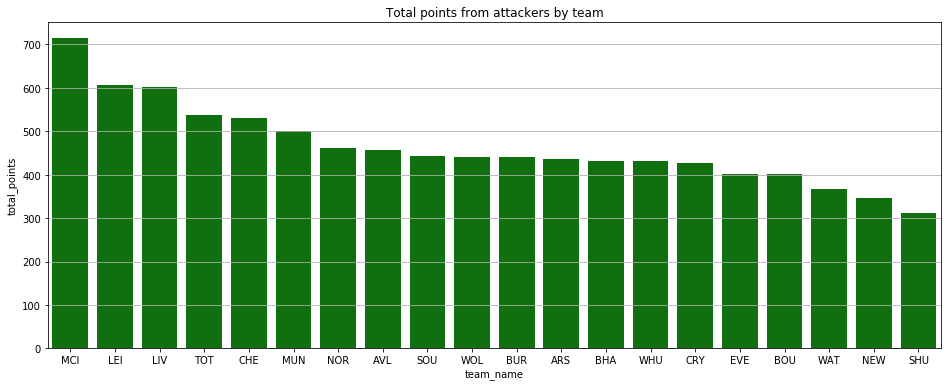

In [17]:
# bar chart of pl teams with most fantasy points from attackers


team_points_A = df2.groupby('team_name').sum().sort_values('total_points', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=team_points_A.index, y='total_points', data=team_points_A, color='g')
plt.title('Total points from attackers by team')
plt.grid(True, axis='y')
plt.show()


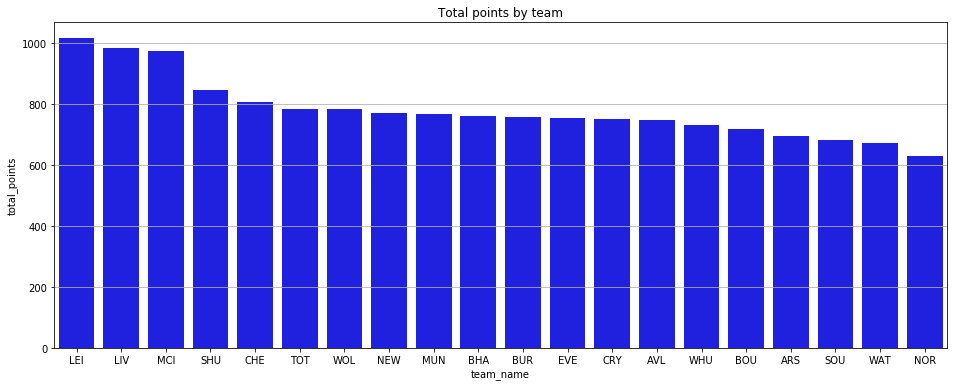

In [18]:
# bar chart of pl teams with most fantasy points

team_points = df1.groupby('team_name').sum().sort_values('total_points', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=team_points.index, y='total_points', data=team_points, color='b')
plt.title('Total points by team')
plt.grid(True, axis='y')

plt.show()

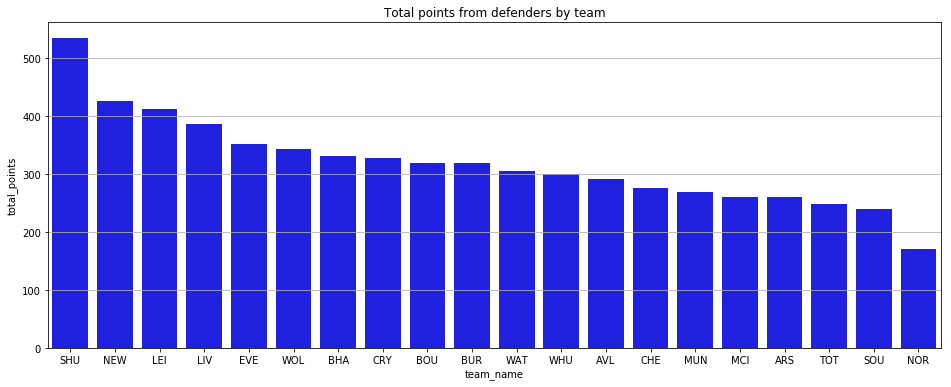

In [19]:
# bar chart of pl teams with most fantasy points from defenders


team_points_D = df3.groupby('team_name').sum().sort_values('total_points', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=team_points_D.index, y='total_points', data=team_points_D, color='b')
plt.title('Total points from defenders by team')
plt.grid(True, axis='y')

plt.show()

In [20]:
points_D = []
for team in team_points.index:
    points_D.append(team_points_D.loc[team].values[0])

In [21]:
points_A = []
for team in team_points.index:
    points_A.append(team_points_A.loc[team].values[0])

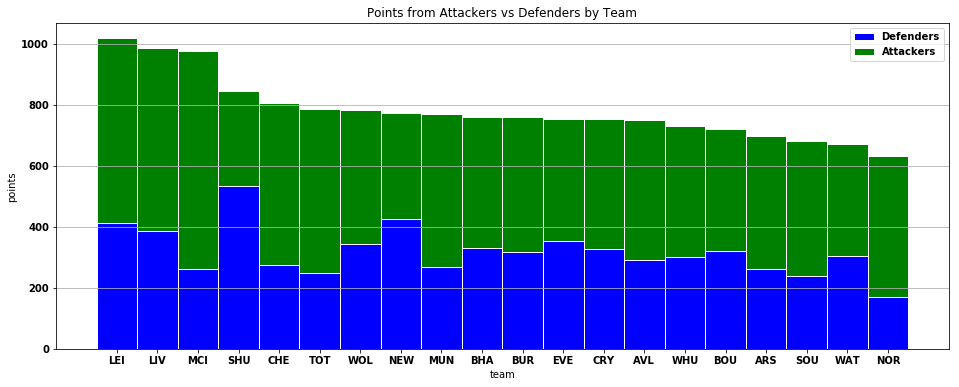

In [22]:
# https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/
# libraries
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = points_D
bars2 = points_A

player_type = ['Defenders', 'Attackers'] 

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [i for i in range(20)]
 
# Names of group and bar width
names = list(team_points.index)
barWidth = 1
plt.figure(figsize=(16, 6))

# Create blue bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='green', edgecolor='white', width=barWidth)

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("team")
plt.ylabel("points")
plt.title("Points from Attackers vs Defenders by Team")
plt.legend(player_type, loc=1)
plt.grid(True, axis='y')

plt.show()


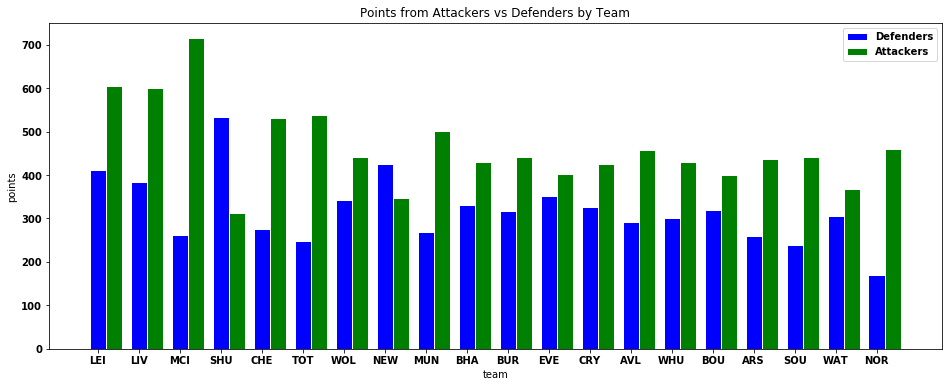

In [23]:
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = points_D
bars2 = points_A

player_type = ['Defenders', 'Attackers'] 

 
# The position of the bars on the x-axis
r = np.array([i for i in range(20)])
 
# Names of group and bar width
names = list(team_points.index)
barWidth = .4
plt.figure(figsize=(16, 6))

# Create bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)

plt.bar(r+barWidth, bars2, color='green', edgecolor='white', width=barWidth)

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("team")
plt.ylabel("points")
plt.title("Points from Attackers vs Defenders by Team")
plt.legend(player_type, loc=1)
# Show graphic
plt.show()


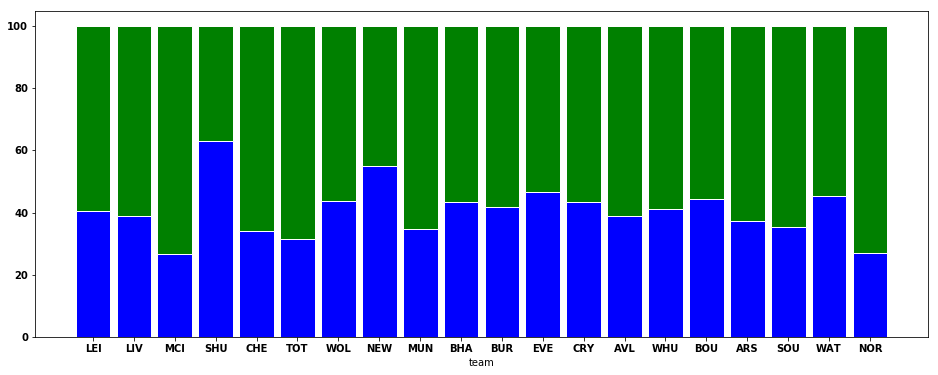

In [24]:
# Data
r = [i for i in range(20)]
raw_data = {'blueBars': points_D, 'greenBars': points_A}
df_raw_data = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df_raw_data['blueBars'], df_raw_data['greenBars'])]
blueBars = [i / j * 100 for i,j in zip(df_raw_data['blueBars'], totals)]
greenBars = [i / j * 100 for i,j in zip(df_raw_data['greenBars'], totals)]

 
# plot
barWidth = 0.85
names = list(team_points.index)
plt.figure(figsize=(16, 6))

# Create blue Bars
plt.bar(r, blueBars, color='blue', edgecolor='white', width=barWidth)
# Create green Bars
plt.bar(r, greenBars, bottom=blueBars, color='green', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("team")
 
# Show graphic
plt.show()


In [25]:
# tree maps for city, liverpool, leicester 
print(df.columns)

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'in_dreamteam',
       'influence', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')


In [26]:
liverpool = df[df['team'] == 10]
man_city = df[df['team'] == 11][:18]
leicester = df[df['team'] == 9][:17]

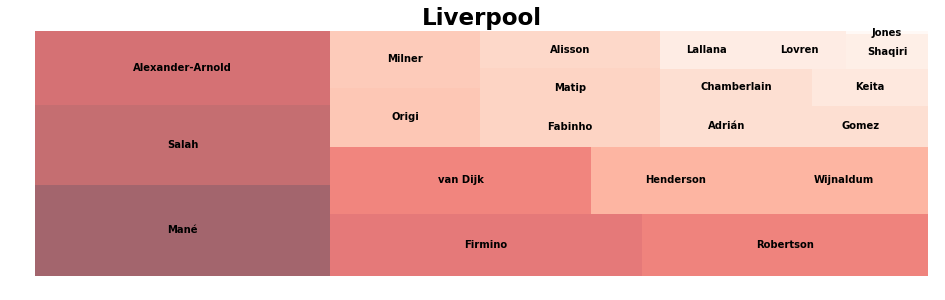

In [30]:
#Utilise matplotlib to scale our data between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(liverpool['total_points']), vmax=max(liverpool['total_points']))
colors = [matplotlib.cm.Reds(norm(value)) for value in liverpool['total_points']]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=liverpool['web_name'],sizes=liverpool['total_points'], color = colors, alpha=.6)
plt.title("Liverpool",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

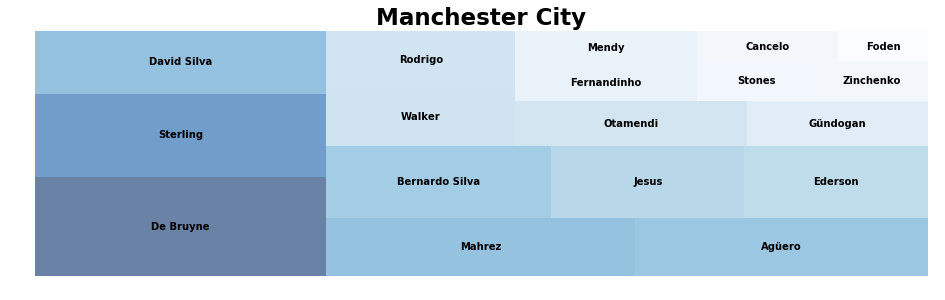

In [31]:
#Utilise matplotlib to scale our data between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(man_city['total_points']), vmax=max(man_city['total_points']))
colors = [matplotlib.cm.Blues(norm(value)) for value in man_city['total_points']]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=man_city['web_name'],sizes=man_city['total_points'], color = colors, alpha=.6)
plt.title("Manchester City",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

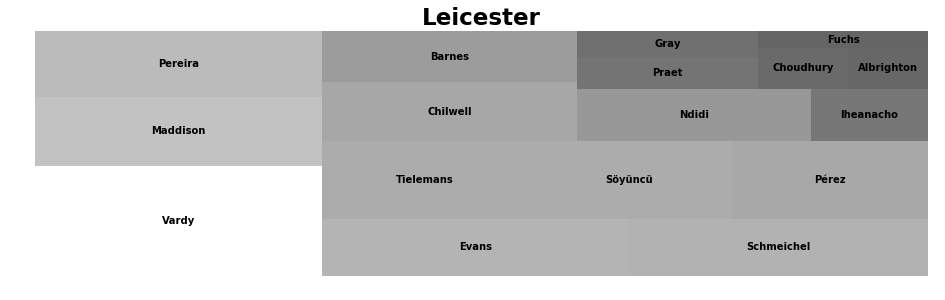

In [29]:
#Utilise matplotlib to scale our data between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(leicester['total_points']), vmax=max(leicester['total_points']))
colors = [matplotlib.cm.gray(norm(value)) for value in leicester['total_points']]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=leicester['web_name'],sizes=leicester['total_points'], color = colors, alpha=.6)
plt.title("Leicester",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()